# load CIFAR-100

up to 100 000 обязательно

исследования и эксперименты

поиграться с архитектурами

top1 accuracy

надо будет рассказать что дало баф и что пробовали

если просто каждую один раз обучить, то 15/25 баллов
если чуть чуть исследований то 20
доп баллы победителям категорий (маленькие круче)


In [ ]:
import torch
import numpy as np
torch.manual_seed(100)

from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor, Compose
import matplotlib.pyplot as plt

In [ ]:
from collections import defaultdict
import copy
import random
import os
import shutil
from urllib.request import urlretrieve

import albumentations as A
from albumentations.pytorch import ToTensorV2
import cv2
import matplotlib.pyplot as plt
from tqdm import tqdm
import torch
import torch.backends.cudnn as cudnn
import torch.nn as nn
import torch.optim
from torch.utils.data import Dataset, DataLoader
import torchvision.models as models

cudnn.benchmark = True

In [ ]:
train_transform = A.Compose(
    [
        A.LongestMaxSize(40),
        A.ShiftScaleRotate(shift_limit=0.05, scale_limit=0.05, rotate_limit=15, p=0.5),
        A.RandomCrop(height=32, width=32),
        A.RandomBrightnessContrast(p=0.5),
        #A.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)),
        ToTensorV2(),
    ]
)
val_transform = A.Compose(
    [   
        A.LongestMaxSize(40),
        A.CenterCrop(height=32, width=32),
        #A.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)),
        ToTensorV2(),
    ]
)

In [ ]:
from torch import nn

device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f'Using {device} device')


Using cuda device


In [ ]:
training_data = datasets.CIFAR100(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.CIFAR100(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

Files already downloaded and verified
Files already downloaded and verified


In [ ]:
classes = """0: apple
1: aquarium_fish
2: baby
3: bear
4: beaver
5: bed
6: bee
7: beetle
8: bicycle
9: bottle
10: bowl
11: boy
12: bridge
13: bus
14: butterfly
15: camel
16: can
17: castle
18: caterpillar
19: cattle
20: chair

21: chimpanzee

22: clock

23: cloud

24: cockroach

25: couch

26: cra

27: crocodile

28: cup

29: dinosaur

30: dolphin

31: elephant

32: flatfish

33: forest

34: fox

35: girl

36: hamster

37: house

38: kangaroo

39: keyboard

40: lamp

41: lawn_mower

42: leopard

43: lion

44: lizard

45: lobster

46: man

47: maple_tree

48: motorcycle

49: mountain

50: mouse

51: mushroom

52: oak_tree

53: orange

54: orchid

55: otter

56: palm_tree

57: pear

58: pickup_truck

59: pine_tree

60: plain

61: plate

62: poppy

63: porcupine

64: possum

65: rabbit

66: raccoon

67: ray

68: road

69: rocket

70: rose

71: sea

72: seal

73: shark

74: shrew

75: skunk

76: skyscraper

77: snail

78: snake

79: spider

80: squirrel

81: streetcar

82: sunflower

83: sweet_pepper

84: table

85: tank

86: telephone

87: television

88: tiger

89: tractor

90: train

91: trout

92: tulip
93: turtle
94: wardrobe
95: whale
96: willow_tree
97: wolf
98: woman
99: worm"""

In [ ]:
labels = classes.split()[1::2]

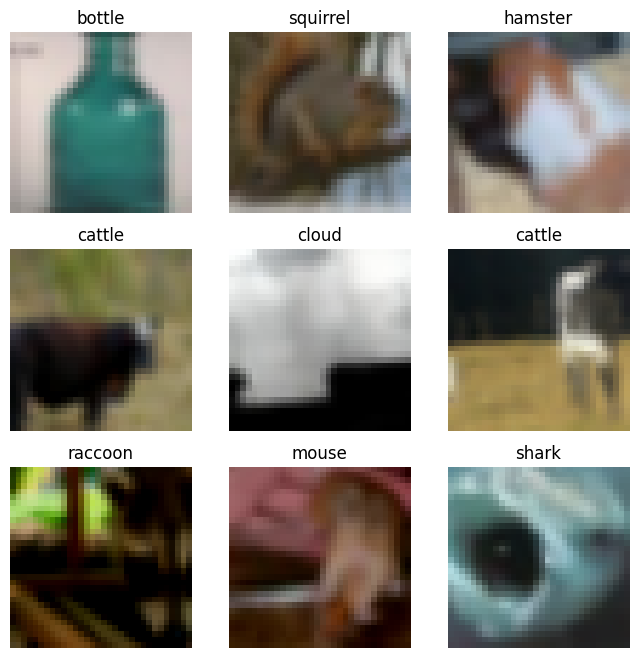

In [ ]:
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(test_data), size=(1,)).item() # Случайный индекс из датасета
    img, label = aug1[sample_idx] # Обращение по такому индексу возвращает изображение и метку элемента датасета
    figure.add_subplot(rows, cols, i)
    plt.title(labels[label])
    plt.axis("off")
    #img = val_transform(image=img.numpy().transpose((1,2,0)))['image']
    plt.imshow(np.moveaxis(img.numpy(),0,-1))
plt.show()

In [ ]:
img.numpy().shape

(3, 32, 32)

In [ ]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(aug1, batch_size=64, shuffle=True)
test_dataloader = DataLoader(aug1t, batch_size=64, shuffle=True)

In [ ]:
#how many params:
def param_count(model):
  c = 0
  for param in model.parameters():
      laypar = 1
      for a in list(param.size()):
          laypar *= a
      #print(f"Size: {list(param.size())}, layer: {laypar}")
      c += laypar
  print(f'model has {c} parameters')

#param_count(model)

In [3]:
i=32
print(i//i//4)

0


# 500 000 params

коммунизжу скип коннекшены у человека с гитхаба 
вообще там много чего, но есть желание применять именно скипы

https://vk.com/away.php?to=https%3A%2F%2Fgithub.com%2Fmagorokhoov%2Fyoutube_pytorch_lessons%2Fblob%2Fmain%2Flesson_5%2FDogs%2520and%2520cats.ipynb&el=snippet

с помощью Хайруллина Артура я их осознал и поприменял

хочу не прост скипы маленькие, а пару блоков, где внутри нескоько скипов и они через разное расстояние

In [ ]:
a = torch.tensor([[1,2],[5,6]])
b = torch.tensor([[3,4]])
torch.concatenate((a,b), axis = 0)

tensor([[1, 2],
        [5, 6],
        [3, 4]])

In [ ]:
class ArcSkip(nn.Module):
    def __init__(self, nc):
        super().__init__()

        self.conv0 = nn.Conv2d(nc, nc, kernel_size=5, groups=2, padding=2)#чтоб параметров меньше группы поставлю: карт много и мешаются в процессе groups=2, 
        self.conv1 = nn.Conv2d(nc, nc, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(nc, nc, kernel_size=3, groups=3, padding=1)
        self.conv3 = nn.Conv2d(nc, nc, kernel_size=5, padding=2)
        self.norm0 = nn.BatchNorm2d(nc)
        self.norm1 = nn.BatchNorm2d(nc)
        self.norm2 = nn.BatchNorm2d(nc)
        self.norm3 = nn.BatchNorm2d(nc)
        self.act = nn.LeakyReLU(0.2)


    def forward(self, x):
        out = self.conv0(x)
        out = self.norm0(out)
        sk1 = self.act(out)

        out = self.conv1(sk1)
        out = self.norm1(out)
        sk2 = self.act(out)

        out = self.conv2(out)
        out = self.norm2(out)
        out = self.act(out)

        out = self.conv3(sk1+out)
        out = self.norm3(out)
        return self.act(x + out)

In [ ]:
class ResBlock(nn.Module):
    def __init__(self, nc):
        super().__init__()

        self.conv0 = nn.Conv2d(nc, nc, kernel_size=3, padding=1)#чтоб параметров меньше группы поставлю: карт много и мешаются в процессе groups=2, 
        self.norm0 = nn.BatchNorm2d(nc)
        self.act = nn.LeakyReLU(0.2)
        self.conv1 = nn.Conv2d(nc, nc, kernel_size=3, padding=1)
        self.norm1 = nn.BatchNorm2d(nc)

    def forward(self, x):
        out = self.conv0(x)
        out = self.norm0(out)
        out = self.act(out)
        out = self.conv1(out)
        out = self.norm1(out)
        return self.act(x + out)

In [ ]:
#ResBlock(сколько карт внутри перевариваются) у человека с гита там вообще 64,128,256

In [ ]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        reslays=54
        self.linear_relu_stack = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=18, kernel_size=(3, 3), stride=1, padding=(1, 1), bias=True),
            nn.ReLU(),
            #32*32pts *18ch
            ResBlock(18),
            nn.Conv2d(in_channels=18, out_channels=reslays, kernel_size=(3, 3), stride=2, padding=(1, 1), bias=True),
            nn.ReLU(),
            #16*16 pts *reslays ch
            ArcSkip(reslays),
            ResBlock(reslays),
            nn.MaxPool2d(kernel_size = (2, 2)),
            #8*8 pts *reslays c
            ArcSkip(reslays),
            ResBlock(reslays),
            nn.MaxPool2d(kernel_size = (2, 2)),
            #4*4 pts *reslays ch
            ResBlock(reslays),
            nn.Conv2d(in_channels=reslays, out_channels=10, kernel_size=(3, 3), stride=1, padding=(1, 1), bias=True),
            nn.Flatten(),
            nn.ReLU(),
            nn.Linear(10*4*4, 100)
        )


    def forward(self, x):
        logits = self.linear_relu_stack(x)
        return logits

In [ ]:
            '''
            #4*4pts *10ch
            nn.Conv2d(in_channels=10, out_channels=100, kernel_size=(5, 5), stride=1, padding=(2, 2), bias=True),
            #4*4pts *100ch
            nn.MaxPool2d(kernel_size = (4, 4)),
            #1*1pts *100ch

                        nn.ReLU(),
            nn.Linear(100, 100)
            '''

'\n#4*4pts *10ch\nnn.Conv2d(in_channels=10, out_channels=100, kernel_size=(5, 5), stride=1, padding=(2, 2), bias=True),\n#4*4pts *100ch\nnn.MaxPool2d(kernel_size = (4, 4)),\n#1*1pts *100ch\n\n            nn.ReLU(),\nnn.Linear(100, 100)\n'

In [ ]:
model = NeuralNetwork().to(device)
#print(model)

In [ ]:
#if works with our data
X = torch.rand(1, 3, 32, 32, device=device)
logits = model(X)
pred_probab = nn.Softmax(dim=1)(logits)
y_pred = pred_probab.argmax(1)
y = y_pred.cpu().numpy()[0]
print(f"Predicted class: {y}, {labels[y]}")

Predicted class: 51, mushroom


In [ ]:
param_count(model)

model has 484632 parameters


learning

In [ ]:
#data to divice!!!

def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    for batch, (X, y) in enumerate(dataloader):
        #move
        X = X.to(device)
        y = y.to(device)
        # Получаем предсказания модели для данного батча
        pred = model(X)
        # Вычисляем лосс
        loss = loss_fn(pred, y)

        # Backpropagation
        # Обнуляем градиенты
        optimizer.zero_grad()
        # Вычисляем градиент лосса по параметрам модели
        loss.backward()
        # Производим шаг алгоритма оптимизации
        optimizer.step()

        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

def test_loop(dataloader, model, loss_fn, accs):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    with torch.no_grad():
        for X, y in dataloader:
            #move
            X = X.to(device)
            y = y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")
    accs.append(100*correct)

In [ ]:
loss_fn = nn.CrossEntropyLoss()
learning_rate = 1e-3
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [ ]:
epochs = 5
accs = []
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    model.train(True)
    train_loop(train_dataloader, model, loss_fn, optimizer)
    model.train(False)
    test_loop(test_dataloader, model, loss_fn, accs)
print("Done!")

Epoch 1
-------------------------------
loss: 0.866675  [    0/50000]
loss: 1.263121  [ 6400/50000]
loss: 1.290699  [12800/50000]
loss: 1.213787  [19200/50000]
loss: 1.304571  [25600/50000]
loss: 1.231135  [32000/50000]
loss: 1.098518  [38400/50000]
loss: 1.265852  [44800/50000]
Test Error: 
 Accuracy: 39.7%, Avg loss: 2.683114 

Epoch 2
-------------------------------
loss: 1.234429  [    0/50000]
loss: 0.757995  [ 6400/50000]


KeyboardInterrupt: ignored

In [ ]:
#epochs = t
epochs

15

In [ ]:
#after 15,18
#lr -> /=10
loss_fn = nn.CrossEntropyLoss()
learning_rate /= 10
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [ ]:
#дообучить
epochs2 = 2
for t in range(epochs, epochs+epochs2):
    print(f"Epoch {t+1}\n-------------------------------")
    model.train(True)
    train_loop(train_dataloader, model, loss_fn, optimizer)
    model.train(False)
    test_loop(test_dataloader, model, loss_fn, accs)
epochs += epochs2
print("Done!")

Epoch 6
-------------------------------
loss: 1.226231  [    0/50000]
loss: 1.175178  [ 6400/50000]
loss: 1.008620  [12800/50000]
loss: 1.318357  [19200/50000]
loss: 0.818865  [25600/50000]
loss: 1.406358  [32000/50000]
loss: 1.194139  [38400/50000]
loss: 1.231498  [44800/50000]
Test Error: 
 Accuracy: 39.1%, Avg loss: 2.805577 

Epoch 7
-------------------------------
loss: 1.021753  [    0/50000]
loss: 0.940212  [ 6400/50000]
loss: 1.226761  [12800/50000]
loss: 1.122052  [19200/50000]
loss: 1.319106  [25600/50000]
loss: 1.079944  [32000/50000]


KeyboardInterrupt: ignored

тут она уже училась переобученная и получалось что я дою пустую уже корову, но что поделать

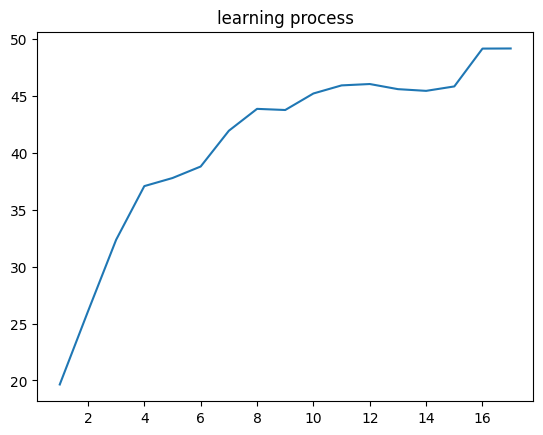

In [ ]:
#pict of learning
plt.plot(range(1,epochs+1), accs, label = 'epochs')
plt.title('learning process')
plt.show()

In [ ]:
#save
torch.save(model.state_dict(), "500000_model.pt")

In [ ]:
#load and check
new_model = NeuralNetwork().eval()
state_dict = torch.load("500000_model.pt")
new_model.load_state_dict(state_dict)

test_loop(test_dataloader, new_model, loss_fn)

TypeError: ignored